### Laptop Price Predictor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("laptop-price-predictor-regression-project-main/laptop_data.csv")

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.shape

(1303, 12)

In [7]:
s=df.dtypes=='object'
cols=s[s].index
cols

Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
       'Gpu', 'OpSys', 'Weight'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [9]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [10]:
df["Ram"]=df["Ram"].str.replace("GB","")
df["Weight"]=df["Weight"].str.replace("kg","")

In [11]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [12]:
df["Ram"]=df["Ram"].astype('int32')
df["Weight"]=df["Weight"].astype("float32")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


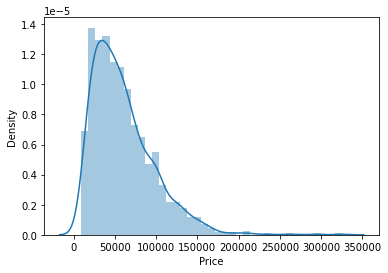

In [14]:
sns.distplot(df["Price"])

*** The data is right skewed ,many laptops which have very high price and many laptops which have low price***

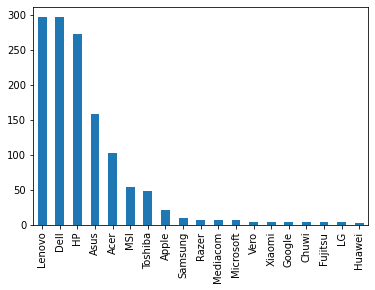

In [15]:
df["Company"].value_counts().plot(kind="bar")

*** Lenevo,Dell and HP laptops are max in numbers in comparison to other laptops ***

* Now, Lets check the price of each of the brand

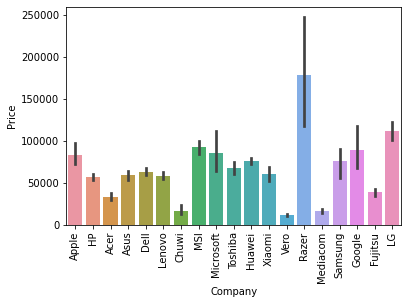

In [16]:
sns.barplot(x=df["Company"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

* Razor,Apple,LG etc. are very costly laptops whereas HP,Acer,Asus etc. are coming in affordable price.
* Prices are changing in accordance with companies.

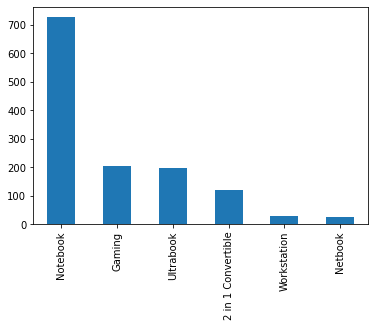

In [17]:
df["TypeName"].value_counts().plot(kind="bar")

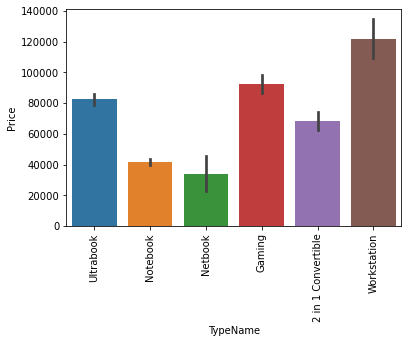

In [18]:
sns.barplot(x=df["TypeName"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

* Workstation has highest price in these all types of laptops.

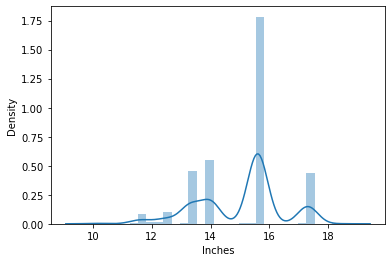

In [19]:
sns.distplot(df["Inches"])

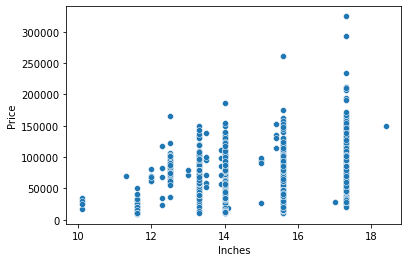

In [20]:
sns.scatterplot(x=df["Inches"],y=df["Price"])

* As the sizes of laptops are increasing prices are also increasing. But there is not so strong relationship between these two variables. 13-15 inches of laptops are of similar prices.

### Feature Engineering

In [21]:
df["ScreenResolution"].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

* Let's extract the hidden information from ScreenResolution column like the laptop is touchscreen or not

In [22]:
df["Touchscreen"]=df["ScreenResolution"].apply(lambda x:1 if "Touchscreen " in x else 0)

In [23]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [24]:
df["Touchscreen"].value_counts()

0    1111
1     192
Name: Touchscreen, dtype: int64

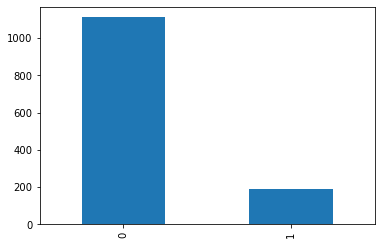

In [25]:
df["Touchscreen"].value_counts().plot(kind="bar")

* Very less no of laptops are touch screen laptop.

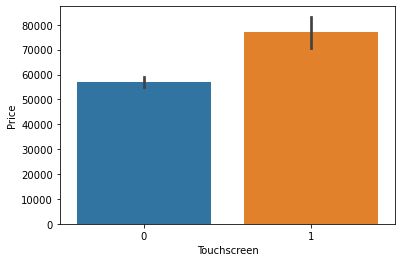

In [26]:
sns.barplot(x=df["Touchscreen"],y=df["Price"])

* Price of touchscreen laptops's are high.
* Now, Extract the IPS Panel Feature from the same variable.

In [27]:
df["IPS Panel"]=df["ScreenResolution"].apply(lambda x: 1 if "IPS Panel" in x else 0)

In [28]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


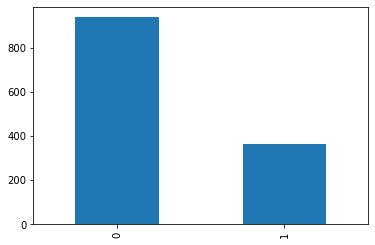

In [29]:
df["IPS Panel"].value_counts().plot(kind="bar")

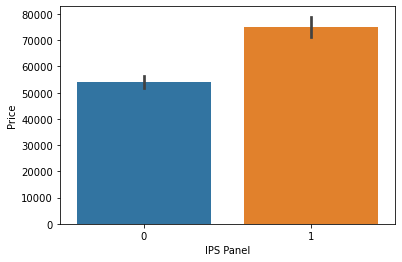

In [30]:
sns.barplot(x=df["IPS Panel"],y=df["Price"])

* Number of no IPS Panel laptop's are higher than IPS Panel Laptop's.
* Price of IPS Panel's laptops are high.

In [31]:
new=df["ScreenResolution"].str.split("x",expand=True)

In [32]:
new

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [33]:
df["X_Res"]=new[0]
df["Y_Res"]=new[1]

In [34]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,X_Res,Y_Res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [35]:
df["X_Res"].str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1298    1920
1299    3200
1300    1366
1301    1366
1302    1366
Name: X_Res, Length: 1303, dtype: object

In [36]:
df["X_Res"]=df["X_Res"].str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [37]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,X_Res,Y_Res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS Panel         1303 non-null   int64  
 13  X_Res             1303 non-null   object 
 14  Y_Res             1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 142.6+ KB


In [39]:
df["X_Res"]=df["X_Res"].astype("int32")
df["Y_Res"]=df["Y_Res"].astype("int32")

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS Panel         1303 non-null   int64  
 13  X_Res             1303 non-null   int32  
 14  Y_Res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


* We have created the two new column X_Res and Y_Res from the ScreeResolution variable and changed the datatype from object to integer type.

In [41]:
df.corr()["Price"]

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS Panel      0.252208
X_Res          0.556529
Y_Res          0.552809
Name: Price, dtype: float64

* Finding the correlation with respect to price

In [42]:
df.drop(["ScreenResolution"],axis=1,inplace=True)

* Let's create a new feature **Pixel per inches** i.e.Ppi by varibles X_Res ,y_Res and Inches.

In [43]:
df["Ppi"]=(((df["X_Res"]**2)+(df["Y_Res"]**2))**0.5/df["Inches"])         

In [44]:
df.corr()["Price"]

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS Panel      0.252208
X_Res          0.556529
Y_Res          0.552809
Ppi            0.473487
Name: Price, dtype: float64

* Ppi has strong correlation with Price variable. Now we don't need the column X_res,Y_Res and Inches because these are of no use now.

In [45]:
df.drop(["X_Res","Y_Res","Inches"],axis=1,inplace=True)

In [46]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,Ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [47]:
df["Cpu"].value_counts()

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     134
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
AMD A6-Series 7310 2GHz          1
Intel Core i7 6920HQ 2.9GHz      1
AMD FX 9830P 3GHz                1
Intel Core i5 2.9GHz             1
AMD E-Series 6110 1.5GHz         1
Name: Cpu, Length: 118, dtype: int64

In [48]:
df["Cpu Name"]=df["Cpu"].apply(lambda x:" ".join(x.split()[0:3]))

In [49]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,Ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


* We have fetched a new column i.e. **Cpu Name** from a column Cpu. 

* Let's create a function for Cpu name so that we can reduce the length of types of processor and convert them into 5 variables.

In [50]:
def fetch_Processor(text):
    if text=="Intel Core i5" or text=="Intel Core i7" or text== "Intel Core i3":
        return text
    else:
        if text.split()[0]=="Intel":
            return "Other Intel Processor"
        else:
            return "AMD Processor"

In [51]:
df["Cpu Brand"]=df["Cpu Name"].apply(fetch_Processor)

In [52]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,Ppi,Cpu Name,Cpu Brand
778,Razer,Gaming,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95,154458.72,0,0,157.350512,Intel Core i7,Intel Core i7
989,Dell,Notebook,Intel Core i5 7200U 2.5GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,1.60,59620.32,0,0,157.350512,Intel Core i5,Intel Core i5
798,Lenovo,2 in 1 Convertible,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.38,71874.72,1,1,158.482530,Intel Core i7,Intel Core i7
1161,MSI,Gaming,Intel Core i7 6700HQ 2.6GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 970M,Windows 10,1.70,94252.32,0,0,157.350512,Intel Core i7,Intel Core i7
123,HP,Notebook,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce 930MX,Windows 10,2.50,67718.88,0,0,127.335675,Intel Core i7,Intel Core i7


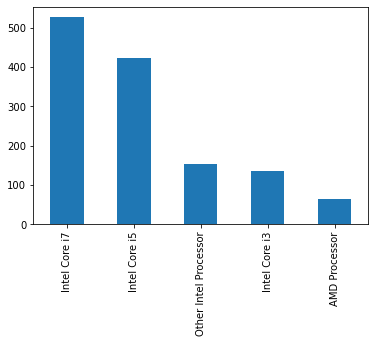

In [53]:
df["Cpu Brand"].value_counts().plot(kind="bar")

* Intel Core i7 is the maximum no of Cpu brand present in the market.

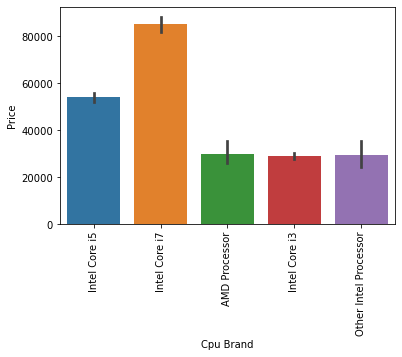

In [54]:
sns.barplot(x=df["Cpu Brand"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

*starting  Price of Intel core i7 is 80000 which very high in comparision to others.

In [55]:
df.drop(["Cpu","Cpu Name"],axis=1,inplace=True)

In [56]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,Ppi,Cpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


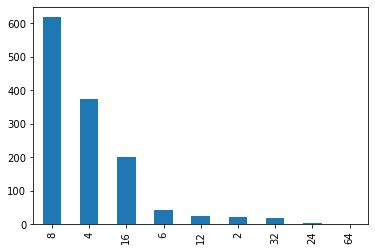

In [57]:
df["Ram"].value_counts().plot(kind="bar")

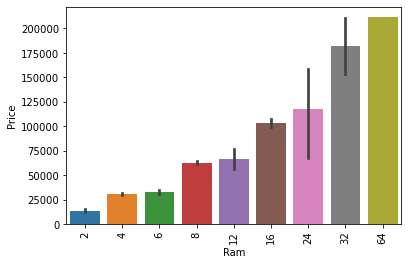

In [58]:
sns.barplot(x=df["Ram"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

* There is a linear relationship between Ram and Price as the Ram is increasing Price is also increasing.

In [59]:
df["Memory"].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
128GB SSD +  2TB HDD               2
1TB SSD +  1TB HDD                 2
512GB Flash Storage                2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
1TB HDD +  1TB HDD                 1
5

In [60]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)

In [61]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,Ppi,Cpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [62]:
df["Memory"].value_counts()

256GB SSD                        412
1TB HDD                          224
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1TB Hybrid                         9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
512GB Flash Storage                2
256GB SSD +  256GB SSD             2
1TB SSD +  1TB HDD                 2
64GB SSD                           1
1

In [63]:
df["Memory"]=df["Memory"].str.replace("GB","")
df["Memory"]=df["Memory"].str.replace("TB","000")
new=df["Memory"].str.split("+",n=1,expand=True)

df["First"]=new[0]
df["First"]=df["First"].str.strip()

df["second"]=new[1]

df["Layer1HDD"]=df["First"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"]=df["First"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["First"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["First"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df["First"]=df["First"].str.replace(r"\D","")
df["second"].fillna("0",inplace=True)

df["Layer2HDD"]=df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"]=df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df["second"]=df["second"].str.replace(r"\D","")

df["First"]=df["First"].astype(int)
df["second"]=df["second"].astype(int)

df["HDD"]=(df["First"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["First"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["First"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["First"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['First', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [64]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,Ppi,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
6,Apple,Ultrabook,16,256 Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,1,220.534624,Intel Core i7,0,0,0,256
1294,HP,Notebook,6,1000 Hybrid,AMD Radeon R7 M440,Windows 10,2.04,29303.4672,0,0,141.211998,AMD Processor,0,0,1000,0
1232,Dell,Notebook,8,1000 HDD,Intel HD Graphics 620,Windows 10,2.30,24988.8528,1,0,100.454670,Intel Core i3,1000,0,0,0
610,Lenovo,Notebook,32,1000 SSD,Nvidia Quadro M2200M,Windows 10,2.50,261018.7200,0,1,282.423996,Other Intel Processor,0,1000,0,0
802,Dell,Ultrabook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.29,79866.7200,0,0,165.632118,Intel Core i5,0,256,0,0


In [65]:
df.drop(["Memory"],axis=1,inplace=True)

* Here we have created new columns i.e. HDD,SSD,Hybrid and Flash_Storage from Memory column and drop the column Memory.

In [66]:
df.corr()["Price"]

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS Panel        0.252208
Ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

* HDD has very high negative correlation with price and ***SSD has high positive*** correlation with the price means as SSD increases Price also increases. Hybrid and Flash_Storage have not highly correlated so these two coumn are of no use, so we will drop these two columns.

In [67]:
df.drop(["Hybrid","Flash_Storage"],axis=1,inplace=True)

In [68]:
df["Gpu"].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia GeForce GTX1060       1
AMD Radeon 540               1
Nvidia GeForce 940M          1
AMD Radeon R9 M385           1
AMD Radeon Pro 555           1
Name: Gpu, Length: 110, dtype: int64

In [69]:
df["Gpu brand"]=df["Gpu"].apply(lambda x: x.split()[0])

In [70]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,Ppi,Cpu Brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [71]:
df["Gpu brand"].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [72]:
df.drop(df[df["Gpu brand"]=="ARM"].index,inplace=True)

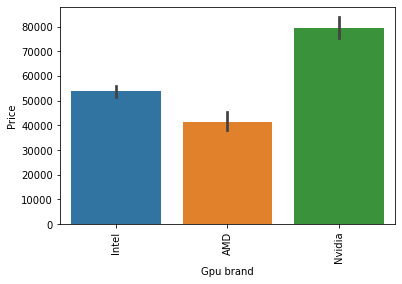

In [73]:
sns.barplot(x=df["Gpu brand"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

In [74]:
df.drop(["Gpu"],axis=1,inplace=True)

In [75]:
df["OpSys"].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

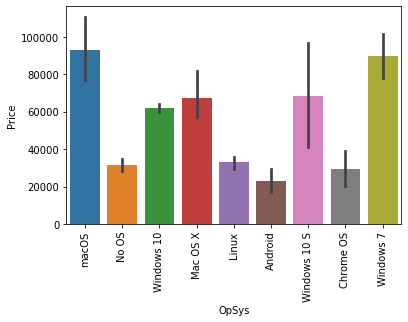

In [76]:
sns.barplot(x=df["OpSys"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

In [77]:
def cat_os(inp):
    if inp=="Windows 10"or inp=="Windows 10 S" or inp=="Windows 7":
        return "Windows"
    elif inp=="macOS" or inp=="Mac OS X":
        return "Mac"
    else:
        return "Others/No OS/Linux"
    

In [78]:
df["os"]=df["OpSys"].apply(cat_os)

In [79]:
df["os"]

0                      Mac
1                      Mac
2       Others/No OS/Linux
3                      Mac
4                      Mac
               ...        
1298               Windows
1299               Windows
1300               Windows
1301               Windows
1302               Windows
Name: os, Length: 1302, dtype: object

In [80]:
df.drop(["OpSys"],axis=1,inplace=True)

In [81]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS Panel,Ppi,Cpu Brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


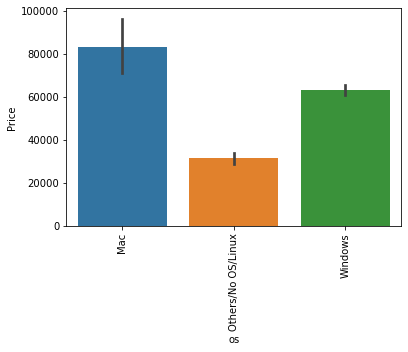

In [82]:
sns.barplot(x=df["os"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

* Mac Os is costlier than all other Os.

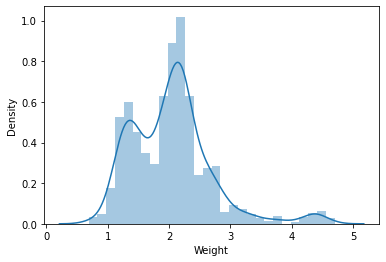

In [83]:
sns.distplot(df["Weight"])

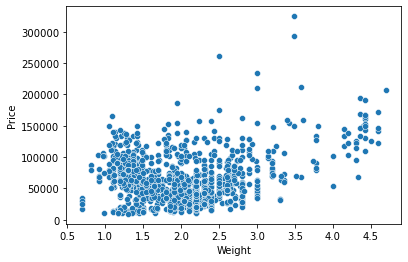

In [84]:
sns.scatterplot(x=df["Weight"],y=df["Price"])

In [85]:
df.corr()["Price"]

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
IPS Panel      0.253320
Ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

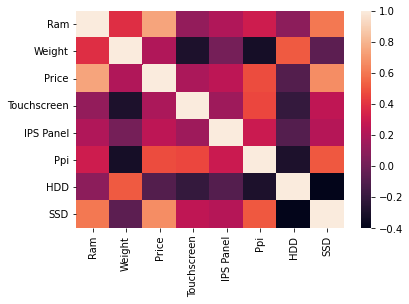

In [86]:
sns.heatmap(df.corr())

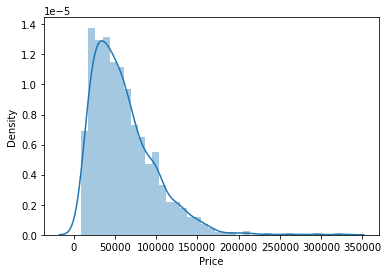

In [87]:
sns.distplot(df["Price"])

* Our target column is skewed so we will take the log of price variable and normalise the curve.

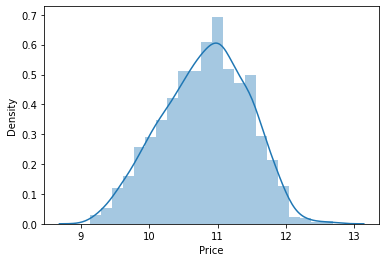

In [88]:
sns.distplot(np.log(df["Price"]))

### Machine Learning

In [89]:
x=df.drop(["Price"],axis=1)
y=np.log(df["Price"])

In [90]:
x.head()

,Company,TypeName,Ram,Weight,Touchscreen,IPS Panel,Ppi,Cpu Brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [91]:
y.head()

0    11.175755
1    10.776777
2    10.329931
3    11.814476
4    11.473101
Name: Price, dtype: float64

* From train test split we will split the x and y

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=2)

In [93]:
x_train

,Company,TypeName,Ram,Weight,Touchscreen,IPS Panel,Ppi,Cpu Brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


* we will do the one hot encoding of columns Cpu Brand, Gpu brand and os.

In [94]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [95]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor

### Linear Regression

In [96]:
step1=ColumnTransformer(transformers=[("col_tnf",OneHotEncoder(sparse=False,drop="first"),[0,1,7,10,11])],
                        remainder="passthrough")
step2=LinearRegression()

pipe=Pipeline([("step1",step1),("step2",step2)])

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

print("r2 score",r2_score(y_pred,y_test))
print("MAE",mean_absolute_error(y_pred,y_test))

r2 score 0.7677401695079901
MAE 0.2101782797642889


### Ridge Regression

In [97]:
step1=ColumnTransformer(transformers=[("col_tnf",OneHotEncoder(sparse=False,drop="first"),[0,1,7,10,11])],
                        remainder="passthrough")
step2=Ridge(alpha=10)

pipe=Pipeline([("step1",step1),("step2",step2)])

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

print("r2 score",r2_score(y_pred,y_test))
print("MAE",mean_absolute_error(y_pred,y_test))

r2 score 0.7620143752904314
MAE 0.20926802242582948


### Lasso Regression

In [98]:
step1=ColumnTransformer(transformers=[("col_tnf",OneHotEncoder(sparse=False,drop="first"),[0,1,7,10,11])],
                        remainder="passthrough")
step2=Lasso(alpha=0.001)

pipe=Pipeline([("step1",step1),("step2",step2)])

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

print("r2 score",r2_score(y_pred,y_test))
print("MAE",mean_absolute_error(y_pred,y_test))

r2 score 0.7635411140890599
MAE 0.21114361613472565


### Random Forest

In [99]:
step1=ColumnTransformer(transformers=[("col_tnf",OneHotEncoder(sparse=False,drop="first"),[0,1,7,10,11])],
                        remainder="passthrough")
step2=RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)

pipe=Pipeline([("step1",step1),("step2",step2)])

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

print("r2 score",r2_score(y_pred,y_test))
print("MAE",mean_absolute_error(y_pred,y_test))

r2 score 0.8684466259076516
MAE 0.15875464162243105


*** We applied linear regression, ridge , lasso and random forest algorithm the best accuracy we found through random forest ***